### IMPORTING LIBRARIES

In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere, plot_histogram
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit
from qiskit.visualization import circuit_drawer

### REQUIRED RESULTS

In [2]:
# Define the states psi_1 and psi_2
alpha = 1/3**0.5
beta = (2/3)**0.5
psi_1 = [alpha, beta]
psi_2 = [beta, -alpha]

# Calculated probabilities
probability_1 = (alpha+beta)**2/2
probability_2 = (beta-alpha)**2/2

print("Probability of measuring |ψ1⟩ after measuring |+⟩ in this basis:", probability_1)
print("Probability of measuring |ψ2⟩ after measuring |+⟩ in this basis:", probability_2)

Probability of measuring |ψ1⟩ after measuring |+⟩ in this basis: 0.9714045207910319
Probability of measuring |ψ2⟩ after measuring |+⟩ in this basis: 0.028595479208968298


In [3]:
print("Amplitude of |ψ1⟩ : ")
print((alpha+beta)/2**0.5)
print()
print("Amplitude of |ψ2⟩ : ")
print((beta-alpha)/2**0.5)

Amplitude of |ψ1⟩ : 
0.9855985596534889

Amplitude of |ψ2⟩ : 
0.16910197872576269


### SIMULATING CIRCUIT

In [17]:
# Create a quantum circuit with 1 qubit
qc = QuantumCircuit(1)

# Initialize the qubit to the |+> state
qc.h(0)

# Define the unitary transformation to change basis
unitary_transformation = [[1/3**0.5, (2/3)**0.5], [(2/3)**0.5, -1/3**0.5]]

# Apply the unitary transformation to change basis
qc.unitary(unitary_transformation, [0], label='U')
qc.save_statevector()

# Measure the qubit in the computational basis
qc.measure_all()

# Simulate the circuit
s=2000 #number of shots
result = AerSimulator().run(qc, shots=s, memory=True).result()
#print(result.data())

#obtaining state vectors
state_vector=result.get_statevector()

In [24]:
state_vector.draw('latex')

<IPython.core.display.Latex object>

In [25]:
#measure probabilities
print("Probability of measuring |ψ1⟩ after measuring |+⟩ in this basis:", state_vector[0]**2)
print("Probability of measuring |ψ2⟩ after measuring |+⟩ in this basis:", state_vector[1]**2)

Probability of measuring |ψ1⟩ after measuring |+⟩ in this basis: (0.9714045207910318+0j)
Probability of measuring |ψ2⟩ after measuring |+⟩ in this basis: (0.028595479208968343+0j)


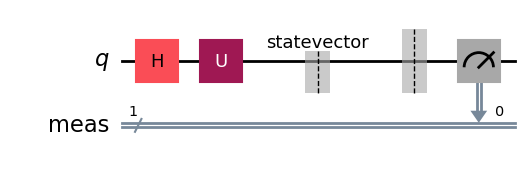

In [26]:
# Draw the circuit diagram
qc.draw("mpl")

### VERIFICATION USING MULTIPLE SHOTS

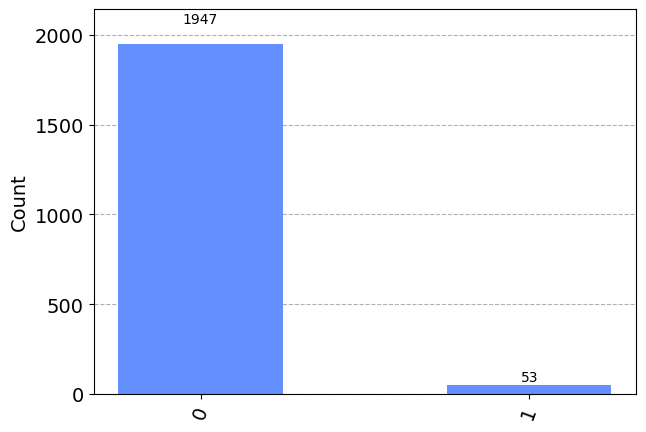

In [27]:
plot_histogram(result.get_counts())

In [28]:
print((result.get_counts()['1']/s))

0.0265


In [29]:
print((result.get_counts()['0']/s))

0.9735


### TRANSPILATION

In [19]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager 
pm = generate_preset_pass_manager(optimization_level=1, basis_gates=['x','sx','rz','id','ecr'])

In [21]:
qc2=QuantumCircuit(2)
qc2.h(0)
qc2.cx(0,1)

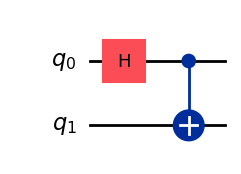

In [22]:
qc2.draw("mpl")

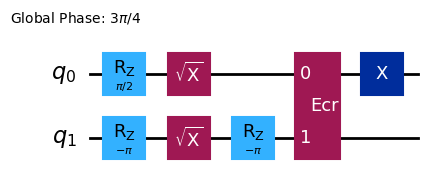

In [23]:
trans_qc2 = pm.run(qc2)
trans_qc2.draw("mpl")